Initial Environment:


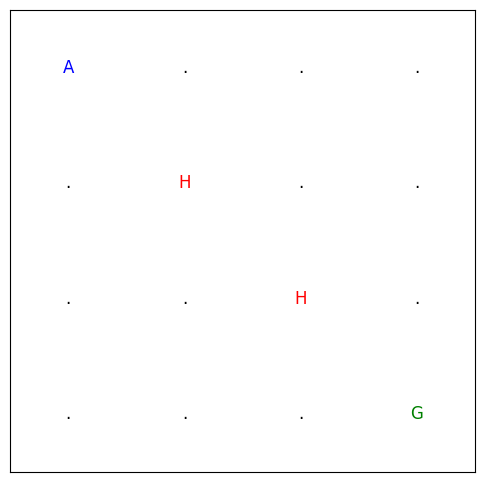


Action: 2


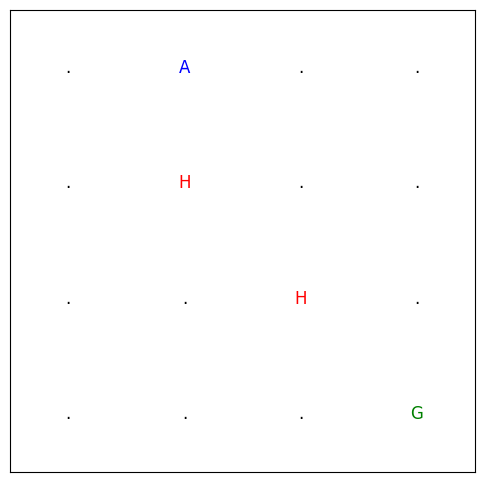

Reward: 0.0

Action: 0


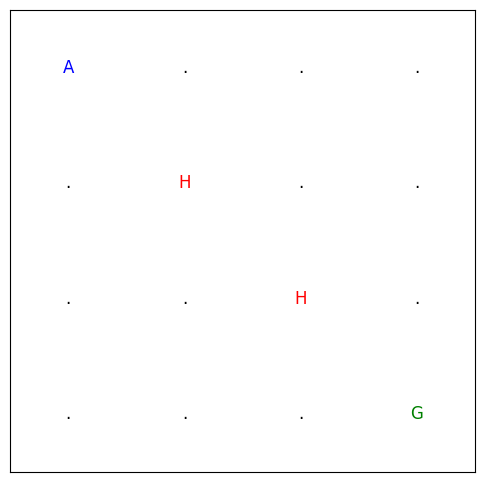

Reward: 0.0

Action: 2


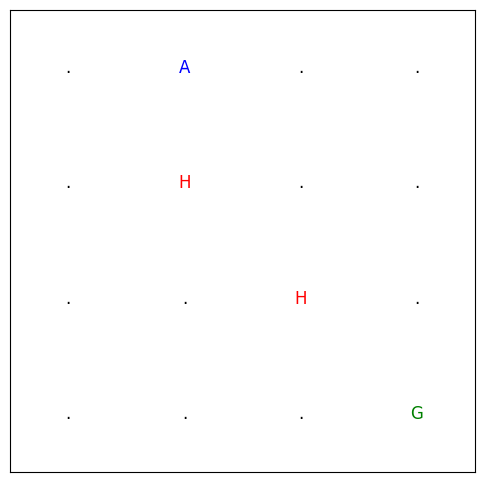

Reward: 0.0

Action: 2


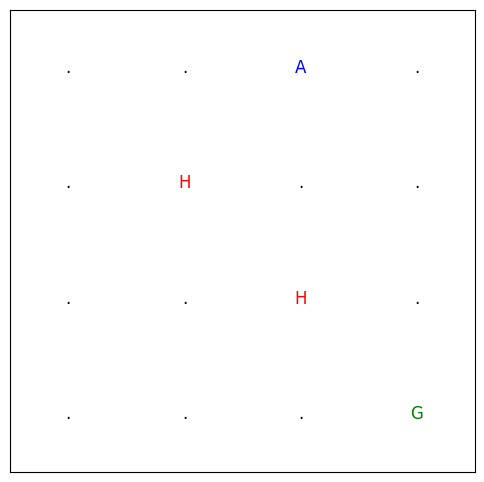

Reward: 0.0

Action: 3


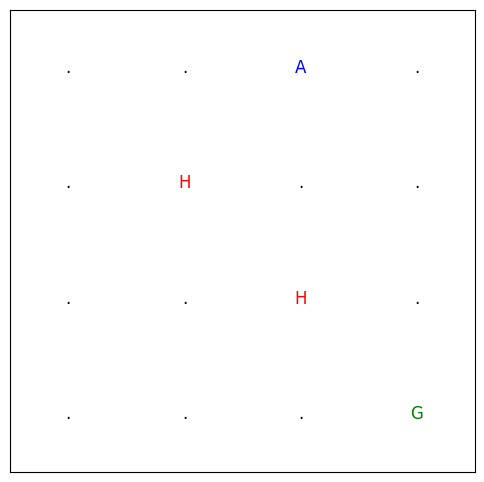

Reward: 0.0

Action: 0


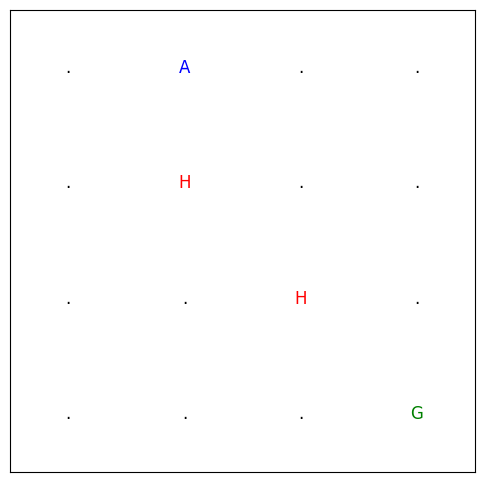

Reward: 0.0

Action: 2


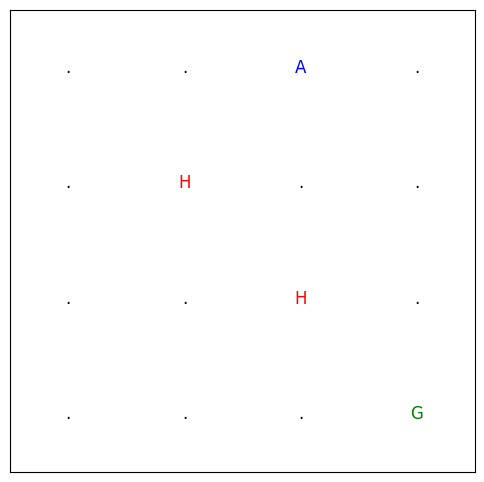

Reward: 0.0

Action: 2


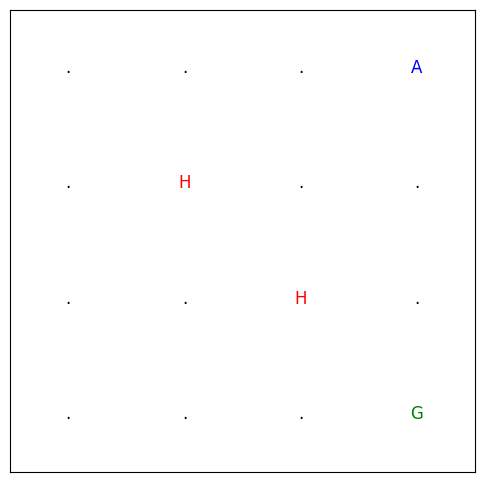

Reward: 0.0

Action: 2


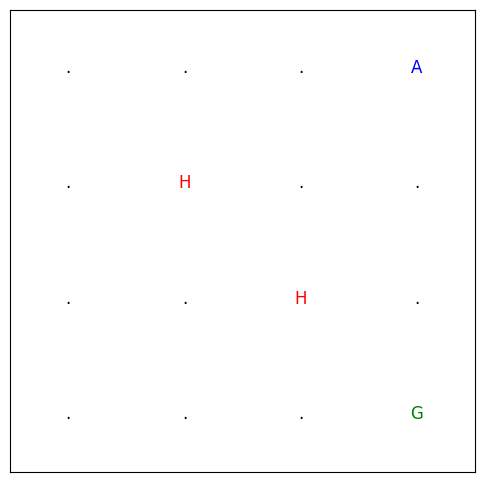

Reward: 0.0

Action: 1


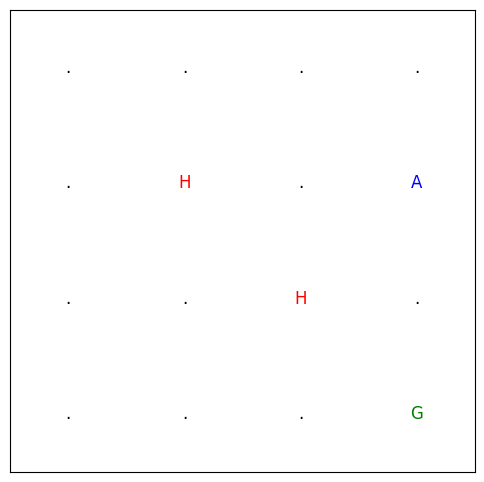

Reward: 0.0

Action: 2


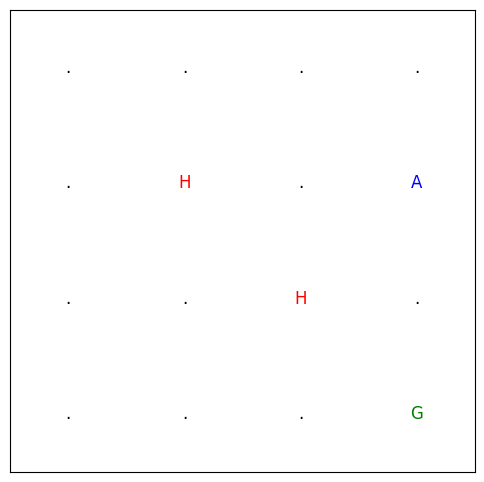

Reward: 0.0

Action: 3


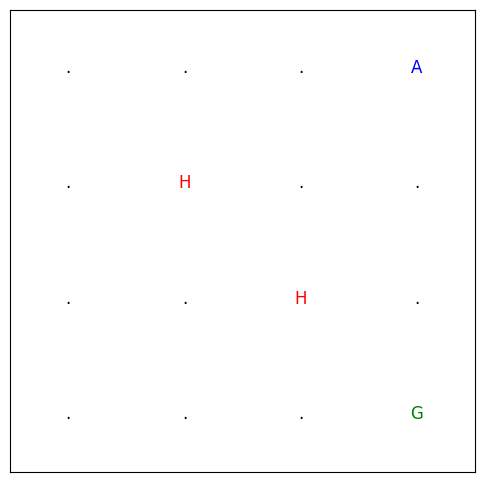

Reward: 0.0

Action: 3


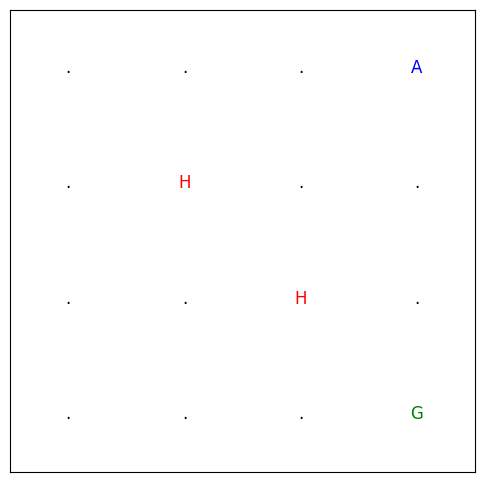

Reward: 0.0

Action: 0


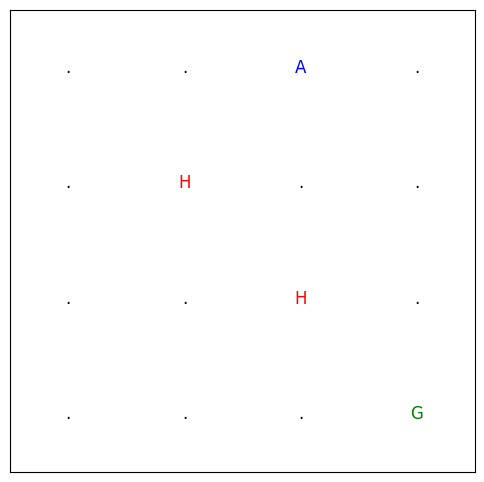

Reward: 0.0

Action: 1


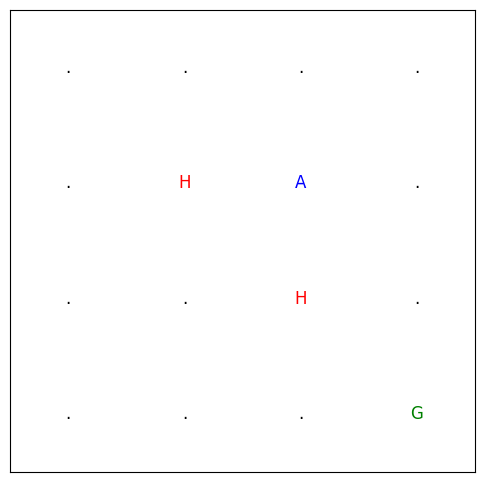

Reward: 0.0

Action: 1


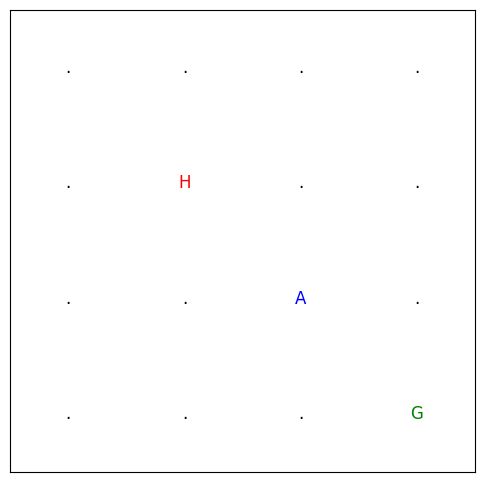

Reward: -1.0


In [3]:
import numpy as np
import gym
from gym import Env, spaces

class CustomFrozenLakeEnv(Env):
    def __init__(self, grid_size=4):
        super(CustomFrozenLakeEnv, self).__init__()

        #define grid size
        self.grid_size = grid_size

        # action spaces : 0 - left ; 1 - down ; 2 - right ; 3 - up
        self.action_space = spaces.Discrete(4)

        # observation space where each state corresponds to a grid cell
        self.observation_space = spaces.Discrete(grid_size * grid_size)

        # define lake layout : 0 = frozen, 1 = hole, 2 = goal
        self.lake = np.zeros((grid_size, grid_size), dtype=int)
        self.lake[-1, -1] = 2  # Goal
        self.lake[1, 1] = 1  # Hole
        self.lake[2, 2] = 1  # Hole

        #rewards
        self.rewards = np.zeros_like(self.lake, dtype=float)
        self.rewards[-1, -1] = 1.0  # reward
        self.rewards[self.lake == 1] = -1.0  # penalty

        
        #starting state
        self.state = (0, 0)


    def step(self, action):
        x, y = self.state

        # move agent
        if action == 0:  # Left
            y = max(0, y - 1)
        elif action == 1:  # Down
            x = min(self.grid_size - 1, x + 1)
        elif action == 2:  # Right
            y = min(self.grid_size - 1, y + 1)
        elif action == 3:  # Up
            x = max(0, x - 1)

        # state updation
        self.state = (x, y)

        reward = self.rewards[x, y]

        # termination check
        done = self.lake[x, y] == 2 or self.lake[x, y] == 1

        # return all info
        return self._get_state_index(), reward, done, {}

    def reset(self):
        self.state = (0, 0)
        return self._get_state_index()

    def render(self):
        # Create a plot for the environment
        fig, ax = plt.subplots(figsize=(6, 6))
        
        # Set up grid for visualization
        ax.set_xticks(np.arange(self.grid_size + 1) - 0.5, minor=True)
        ax.set_yticks(np.arange(self.grid_size + 1) - 0.5, minor=True)
        ax.grid(which="minor", color='black', linestyle='-', linewidth=2)
        
        # Remove major ticks to make the grid cleaner
        ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

        # Draw the environment with agent position
        for x in range(self.grid_size):
            for y in range(self.grid_size):
                if (x, y) == self.state:
                    ax.text(y, self.grid_size - 1 - x, 'A', ha='center', va='center', fontsize=12, color='blue')
                elif self.lake[x, y] == 1:
                    ax.text(y, self.grid_size - 1 - x, 'H', ha='center', va='center', fontsize=12, color='red')
                elif self.lake[x, y] == 2:
                    ax.text(y, self.grid_size - 1 - x, 'G', ha='center', va='center', fontsize=12, color='green')
                else:
                    ax.text(y, self.grid_size - 1 - x, '.', ha='center', va='center', fontsize=12, color='black')

        # Display the plot
        plt.draw()
        plt.pause(0.1)  # Pause for a short time to refresh the plot

        # Show plot after rendering
        plt.show()

    def _get_state_index(self):
        return self.state[0] * self.grid_size + self.state[1]



env = CustomFrozenLakeEnv(grid_size=4)
state = env.reset()
done = False

print("Initial Environment:")
env.render()

while not done:
    action = env.action_space.sample()  # random policy
    next_state, reward, done, info = env.step(action)
    print(f"\nAction: {action}")
    env.render()
    print(f"Reward: {reward}")